https://www.kaggle.com/code/werooring/ch6-eda/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/aiffel/bike/bike-sharing-demand/



Mounted at /content/drive
/content/drive/MyDrive/aiffel/bike/bike-sharing-demand


In [2]:
df = pd.read_csv('./train.csv')

In [3]:
print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [4]:
print(df["datetime"])

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object


In [5]:
#date = pd.to_datetime(df["datetime"],format='%Y-%m-%d %H:%M:%S', errors='raise')

In [6]:
#print(date)

In [7]:
'''
df["bike_year"] = df["datetime"].dt.year
df["bike_month"] = df["datetime"].dt.month
df["bike_day"] = df["datetime"].dt.day
df["bike_hour"] = df["datetime"].dt.hour
df["bike_minute"] = df["datetime"].dt.minute
df["bike_second"] = df["datetime"].dt.second
'''

'\ndf["bike_year"] = df["datetime"].dt.year\ndf["bike_month"] = df["datetime"].dt.month\ndf["bike_day"] = df["datetime"].dt.day\ndf["bike_hour"] = df["datetime"].dt.hour\ndf["bike_minute"] = df["datetime"].dt.minute\ndf["bike_second"] = df["datetime"].dt.second\n'

In [8]:
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['minute'] = pd.to_datetime(df['datetime']).dt.minute
df['second'] = pd.to_datetime(df['datetime']).dt.second

#https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/

<Axes: xlabel='second', ylabel='count'>

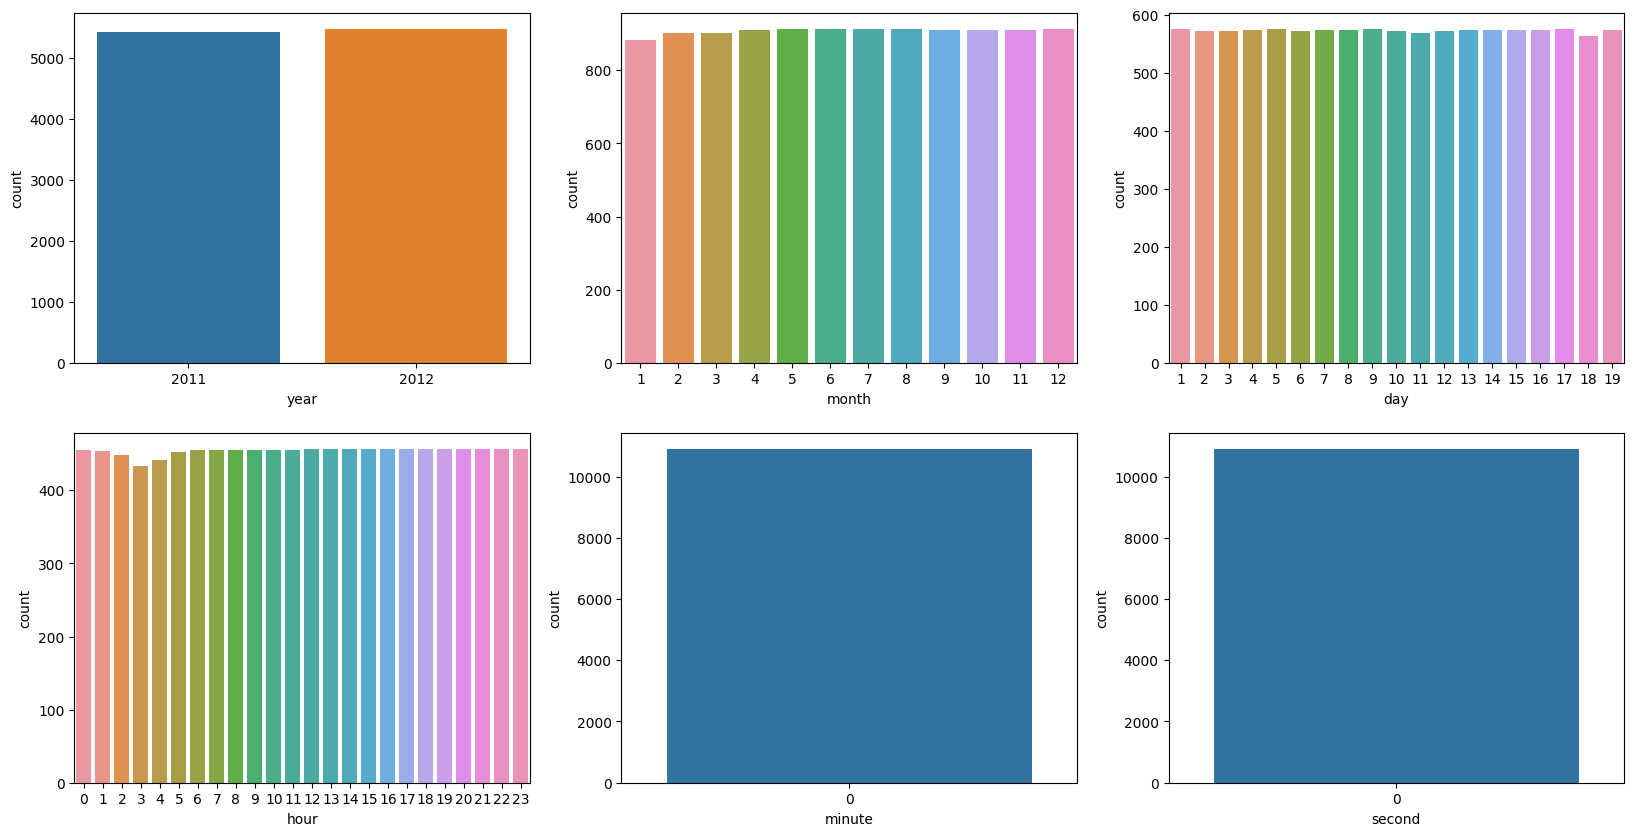

In [9]:
figure, axes = plt.subplots(2,3)
figure.set_size_inches(20,10)

# row 중 2011에 해당하는 갯수

sns.countplot(x = 'year', data = df, ax = axes[0,0])
sns.countplot(x='month', data =df, ax= axes[0,1])
sns.countplot(x='day', data =df, ax= axes[0,2])
sns.countplot(x='hour', data =df, ax= axes[1,0])
sns.countplot(x='minute', data =df, ax= axes[1,1])
sns.countplot(x='second', data =df, ax= axes[1,2])

<Axes: xlabel='second', ylabel='count'>

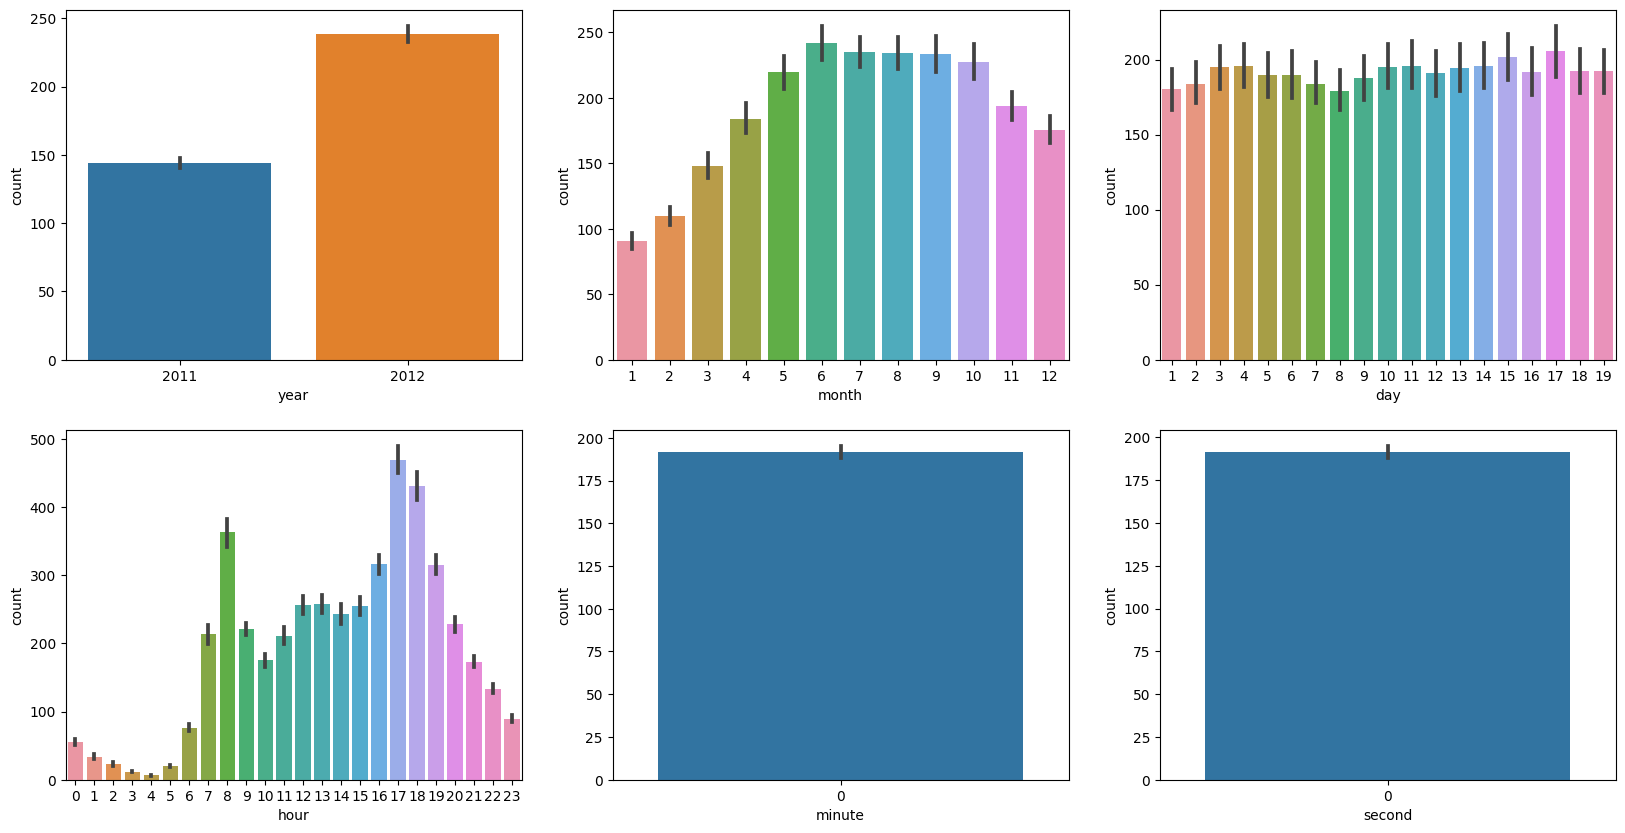

In [10]:
figure1, axes1 = plt.subplots(nrows=2, ncols=3)
figure1.set_size_inches(20,10)

# 자전거 대수 col중에 count 값 평균
sns.barplot(x='year', y='count', data=df, ax=axes1[0, 0])
sns.barplot(x='month', y='count', data=df, ax=axes1[0, 1])
sns.barplot(x='day', y='count', data=df, ax=axes1[0, 2])
sns.barplot(x='hour', y='count', data=df, ax=axes1[1, 0])
sns.barplot(x='minute', y='count', data=df, ax=axes1[1, 1])
sns.barplot(x='second', y='count', data=df, ax=axes1[1, 2])

In [11]:
X = df[['year']]
y = df[['count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [12]:
def mse (X_train, X_test, y_train, y_test) :
  model = LinearRegression()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test,pred)
  print(mse)
  rsme = mse ** 0.5
  print(rsme)
  return pred, mse, rsme



In [13]:
pred_year, mse_year,rsme_year = mse(X_train, X_test, y_train, y_test)


29175.283733447628
170.80773909120052


In [14]:
X = df[['month']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [15]:
pred_month, mse_year,rsme_year = mse(X_train, X_test, y_train, y_test)

30329.764585175868
174.15442740618417


In [16]:
X = df[['day']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_day, mse_day,rsme_day = mse(X_train, X_test, y_train, y_test)

31271.905420131618
176.838642327212


In [17]:
X = df[['hour']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_hour, mse_hour,rsme_hour = mse(X_train, X_test, y_train, y_test)

25747.661551424924
160.46077885709306


In [18]:
X = df[['minute']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_minute, mse_minute,rsme_minute = mse(X_train, X_test, y_train, y_test)

31285.37639857466
176.87672655998205


In [19]:
X = df[['second']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_second, mse_second,rsme_second = mse(X_train, X_test, y_train, y_test)

31285.37639857466
176.87672655998205


In [20]:
X = df[['temp']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_temp,mse_temp,rsme_temp = mse(X_train, X_test, y_train, y_test)

26510.21506494634
162.81957826055913


In [21]:
X = df[['atemp']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_atemp, mse_atemp,rsme_atemp = mse(X_train, X_test, y_train, y_test)

26528.57704268131
162.87595599928588


In [22]:
X = df[['humidity']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_hum, mse_humidity,rsme_humidity = mse(X_train, X_test, y_train, y_test)

27865.71822930852
166.93027954600842


In [23]:
X = df[['windspeed']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_wins, mse_windspeed,rsme_windspeed = mse(X_train, X_test, y_train, y_test)

31045.837683784117
176.1982908083507


In [24]:
X = df[['casual']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_cas, mse_cas,rsme_cas = mse(X_train, X_test, y_train, y_test)

16227.393076150156
127.38678532779669


In [25]:
X = df[['registered']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_res, mse_res,rsme_res = mse(X_train, X_test, y_train, y_test)

1830.6771087470504
42.78641266508622


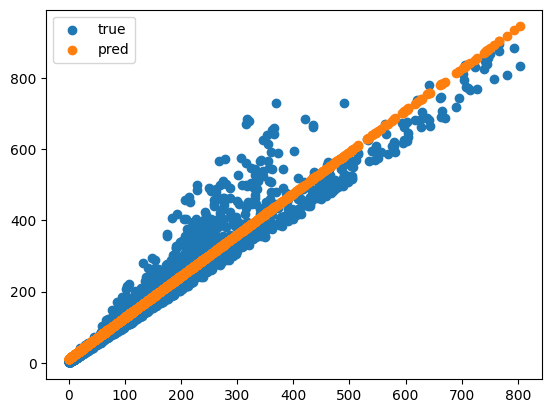

In [26]:
plt.scatter(X_test['registered'], y_test, label="true")
plt.scatter(X_test['registered'], pred_res, label="pred")
plt.legend()
plt.show()

27865.71822930852
166.93027954600842


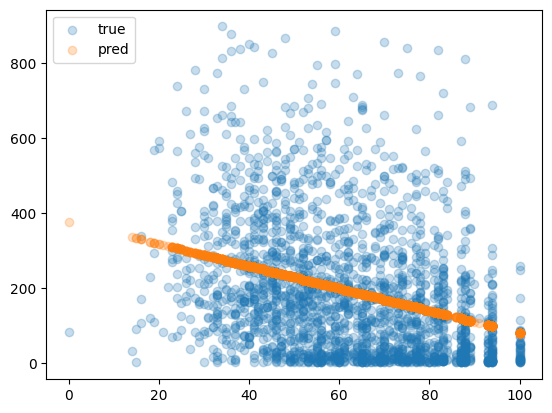

In [27]:
X = df[['humidity']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_hum, mse_humidity,rsme_humidity = mse(X_train, X_test, y_train, y_test)

plt.scatter(X_test['humidity'], y_test, label="true", alpha =0.25)
plt.scatter(X_test['humidity'], pred_hum, label="pred", alpha = 0.25)
plt.legend()
plt.show()

26510.21506494634
162.81957826055913


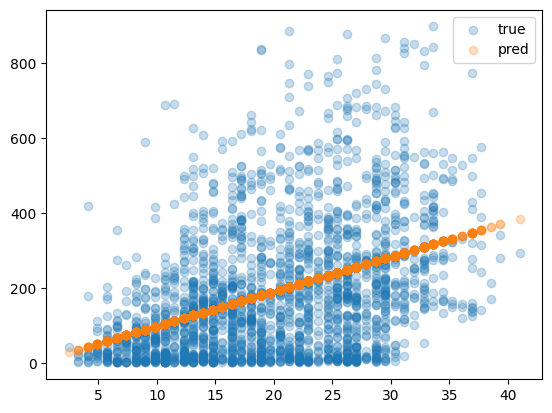

In [28]:
X = df[['temp']]
y = df[['count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred_temp,mse_temp,rsme_temp = mse(X_train, X_test, y_train, y_test)

plt.scatter(X_test['temp'], y_test, label="true", alpha =0.25)
plt.scatter(X_test['temp'], pred_temp, label="pred", alpha =0.25)
plt.legend()
plt.show()

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  minute      10886 non-null  int64  
 17  second      10886 non-null  int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.5+ MB
None


In [30]:
X = df[['season', 'holiday', 'workingday', 'weather', 'year','month','day','hour','temp','atemp','humidity','windspeed']]
y = df[['count']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
pred1, mse1, rsme1 = mse(X_train, X_test, y_train, y_test)



18975.45162676669
137.75141243111335


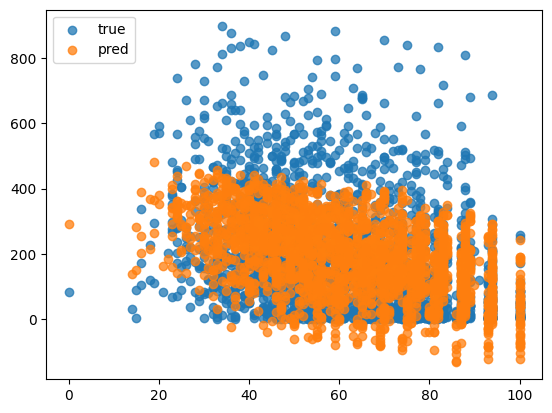

In [31]:

plt.scatter(X_test['humidity'], y_test, label="true", alpha =0.75)
plt.scatter(X_test['humidity'], pred1, label="pred", alpha = 0.75)
plt.legend()
plt.show()

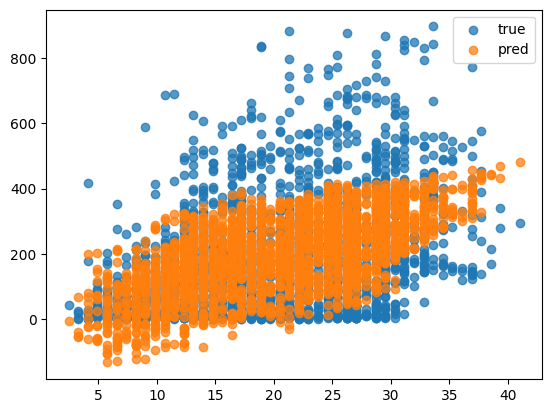

In [32]:
plt.scatter(X_test['temp'], y_test, label="true", alpha =0.75)
plt.scatter(X_test['temp'], pred1, label="pred", alpha = 0.75)
plt.legend()
plt.show()

---
#회고

countplot이랑 barplot차이 고민
위 데이터중 가장 MSE값 낮은거 고민
그냥 corr써도 똑같나?
비슷하게 나올듯